In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import seaborn as sns

In [3]:
sns.set();

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

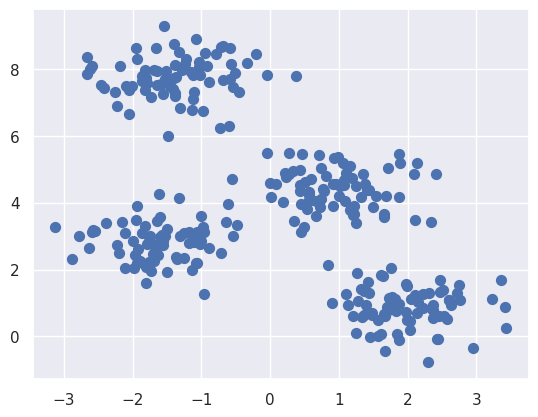

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

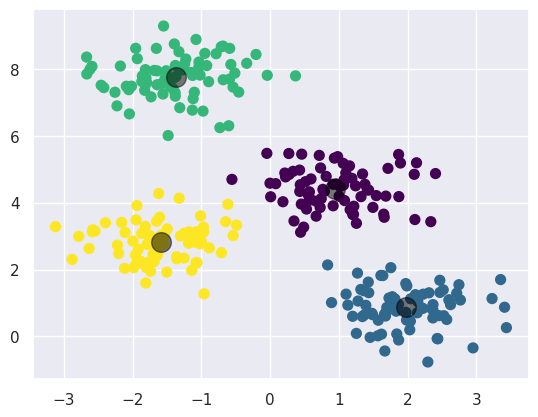

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [16]:
from sklearn.metrics import pairwise_distances_argmin

In [17]:
def find_clusters(X, n_clusters, rseed=2):
    
    # 1. выбираем кластеры случайным образом
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        
        # 2.1 Присваиваем метки в соответствии с ближайшим центром
        labels = pairwise_distances_argmin(X, centers)
        # 2.2 Находим новые центры, исходя из средних значений точек
        new_centers = np.array([X[labels == i].mean(0) for i in range (n_clusters)])
        
        # 2.3 Проверяем сходимость
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

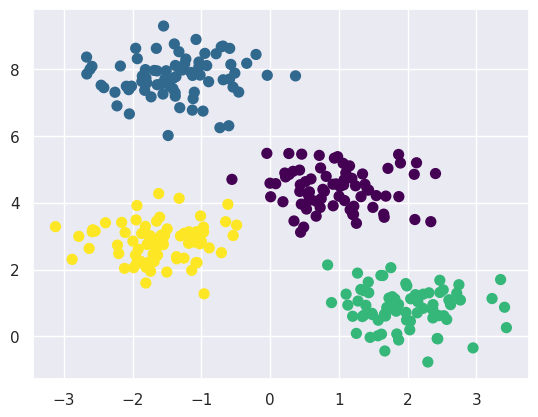

In [18]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');